### FE670 - Assignment #1

**Author**: Sid Bhatia

**Date**: October 5th, 2023

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Dr. Steve Yang

#### Problem #1

We can simulate independent random walk price
processes, each representing the price of a company’s stock, over
1,000 periods using the recursive formulation:

$$P_i(2) = 1 + 0.007 \times \epsilon_i(2)$$
$$P_i(3) = (1 + 0.007 \times \epsilon_i(3) \times (1 + 0.007 \times \epsilon_i(2)))$$
$$\cdots$$
$$P_i(n) = (1 + 0.007 \times \epsilon_i(n)) \times \cdots \times (1 + 0.007 \times \epsilon_i(3)) \times (1 + 0.007 \times \epsilon_i(2))

where $P_i(n)$ represents the $i$-th stock's price at period $n$, $e_i(n)$ are normally normally distributed random processes, and we assume $P_i(1) = 1$. The level of volatility, $0.007$, is compatible with realistic market values.

Let’s take two random price datasets: stock1 data.csv and
stock2 data.csv. Now we will use ChatGPT3.5 to generate a
Python program to test cointegration of these two random stocks.
Please first create a ChatGPT account using the following website: https://chat.openai.com/chat.

Once you created the account and try to ask ChatGPT the
following question: “Please write a Python code to test cointegration of two stocks using both ADF and Johansen test.”
Test the Python code generated by ChatGPT and answer the
following questions:

##### i.

*Does the code generated by ChatGPT work with the data
you generated?*

In [2]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Define the stock tickers and the date range
ticker1 = "AAPL"
ticker2 = "MSFT"
start_date = "2020-01-01"
end_date = "2021-12-31"

# Fetch stock price data from Yahoo Finance
df1 = yf.download(ticker1, start=start_date, end=end_date)['Adj Close']
df2 = yf.download(ticker2, start=start_date, end=end_date)['Adj Close']

# Ensure the data is sorted by date
df1 = df1.sort_index()
df2 = df2.sort_index()

# Perform the ADF test for each stock
adf_result1 = adfuller(df1)
adf_result2 = adfuller(df2)

print("ADF Test Results for Stock 1:")
print(f"ADF Statistic: {adf_result1[0]}")
print(f"P-Value: {adf_result1[1]}")
print(f"Critical Values: {adf_result1[4]}")

print("\nADF Test Results for Stock 2:")
print(f"ADF Statistic: {adf_result2[0]}")
print(f"P-Value: {adf_result2[1]}")
print(f"Critical Values: {adf_result2[4]}")

# Combine the stock price data into a DataFrame
price_df = pd.concat([df1, df2], axis=1)
price_df.columns = [ticker1, ticker2]

# Perform the Johansen test for cointegration
johansen_result = coint_johansen(price_df, det_order=0, k_ar_diff=1)

print("\nJohansen Cointegration Test Results:")
print(f"Trace Statistic: {johansen_result.lr1}")
print(f"Critical Values (Trace Statistic 90%): {johansen_result.cvt}")
print(f"Eigenvalues: {johansen_result.eig}")

# Check the cointegration hypothesis based on the Trace Statistic
trace_statistic_critical_value = johansen_result.cvt[:, 0]  # 90% confidence
if johansen_result.lr1[0] > trace_statistic_critical_value[0]:
    print("\nReject the null hypothesis: Cointegration is present.")
else:
    print("\nFail to reject the null hypothesis: No cointegration.")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ADF Test Results for Stock 1:
ADF Statistic: -0.19413459769564456
P-Value: 0.9392171559832246
Critical Values: {'1%': -3.4434437319767452, '5%': -2.8673146875484368, '10%': -2.569845688481135}

ADF Test Results for Stock 2:
ADF Statistic: -0.039214857513834016
P-Value: 0.9551663766326768
Critical Values: {'1%': -3.4436568932270095, '5%': -2.8674084917497074, '10%': -2.5698956806372832}

Johansen Cointegration Test Results:
Trace Statistic: [4.11817378 0.0287301 ]
Critical Values (Trace Statistic 90%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Eigenvalues: [8.11321095e-03 5.72296407e-05]

Fail to reject the null hypothesis: No cointegration.


The code by ChatGPT seems to work decently, using the correct libraries (pandas, yfinance, statsmodels). It formulates the data into pandas DataFrames, extracts the relevant metrics needed from the correct tests for unit root stationarity (ADF) as well as cointegration (Johansen) test. It retrieves the critical values necessary to test the respective null hypotheses.

##### ii.

*Please provide ways to improve the Python code generated
by ChatGPT. Please note we have price data not return
data.*

ChatGPT used the price data when conducting the tests, when we normally test for stationarity and cointegration for return data. As such, I would modify the code to test the returns for Apple and Microsoft as opposed to prices, since returns are much more likely to be stationarity than prices.

In addition, there is a lack of abstraction with the code that ChatGPT created. I would create functions and document the code, specifying the assumptions made and the actual hypotheses of the tests in my code as opposed to writing it in a script-like fashion.

##### iii.

*Interpret the ADF test result to see whether the stock1 and
stock 2 returns are cointegrated.*

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Define the stock tickers and the date range
ticker1 = "AAPL"
ticker2 = "MSFT"
start_date = "2020-01-01"
end_date = "2021-12-31"

# Fetch stock price data from Yahoo Finance
df1 = yf.download(ticker1, start=start_date, end=end_date)['Adj Close']
df2 = yf.download(ticker2, start=start_date, end=end_date)['Adj Close']

# Ensure the data is sorted by date
df1 = df1.sort_index()
df2 = df2.sort_index()

# Calculate the returns of the two stocks
returns1 = df1.pct_change().dropna()
returns2 = df2.pct_change().dropna()

# Perform the ADF test for each stock
adf_result1 = adfuller(returns1)
adf_result2 = adfuller(returns2)

print("ADF Test Results for Stock 1:")
print(f"ADF Statistic: {adf_result1[0]}")
print(f"P-Value: {adf_result1[1]}")
print(f"Critical Values: {adf_result1[4]}")

print("\nADF Test Results for Stock 2:")
print(f"ADF Statistic: {adf_result2[0]}")
print(f"P-Value: {adf_result2[1]}")
print(f"Critical Values: {adf_result2[4]}")

# Perform the Johansen test for cointegration
# Combine the returns of both stocks into a DataFrame
returns_df = pd.concat([returns1, returns2], axis=1)

# Perform the Johansen cointegration test
johansen_result = coint_johansen(returns_df, det_order=0, k_ar_diff=1)

print("\nJohansen Cointegration Test Results:")
print(f"Trace Statistic: {johansen_result.lr1}")
print(f"Critical Values (Trace Statistic 90%): {johansen_result.cvt}")
print(f"Eigenvalues: {johansen_result.eig}")

# Check the cointegration hypothesis based on the Trace Statistic
trace_statistic_critical_value = johansen_result.cvt[:, 0]  # 90% confidence
if johansen_result.lr1[0] > trace_statistic_critical_value[0]:
    print("\nReject the null hypothesis: Cointegration is present.")
else:
    print("\nFail to reject the null hypothesis: No cointegration.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ADF Test Results for Stock 1:
ADF Statistic: -7.222297651838865
P-Value: 2.0960254760026063e-10
Critical Values: {'1%': -3.4436568932270095, '5%': -2.8674084917497074, '10%': -2.5698956806372832}

ADF Test Results for Stock 2:
ADF Statistic: -6.813505641798653
P-Value: 2.0872061315642546e-09
Critical Values: {'1%': -3.4436568932270095, '5%': -2.8674084917497074, '10%': -2.5698956806372832}

Johansen Cointegration Test Results:
Trace Statistic: [453.91966334 205.24544811]
Critical Values (Trace Statistic 90%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Eigenvalues: [0.39125494 0.33613174]

Reject the null hypothesis: Cointegration is present.


After specifying ChatGPT to use the return data, we see that we reject the null hypothesis that the time series contains a unit root and, thus, is not stationary. As such, both stock 1 and stock 2 are unit root stationary. at the 1% significance level or 99% confidence level since the p-values are less than 0.01 as well as their respective test statistics are less than -3.44.

##### iv.

*Interpret the Johansen test result to see whether the stock1
and stock 2 returns are cointegrated.*

As seen in the results above, given that the critical values for the trace statistic for 90%, we reject the null hypothesis that the there is no cointegration between the two stocks. As such, we accept the alternative hypothesis that cointegration exists between Apple and Microsoft.

##### v.

*Discuss whether you can trust the results from the (3) and
(4) questions, and explain the reason.*

I believe we can trust the results from *iii.* and *iv.* questions due to the fact that these are the correct tests and libraries being used for these questions. In addition, the logic that ChatGPT is correct in establishing the correct hypotheses and methodology for testing whether or not we should reject the null hypothesis or if we fail to reject the null hypothesis.

After checking its code with other code examples from documentation online, it seems correct.

#### Problem #2

The generalized autoregressive conditional heteroscedasticity (GARCH) model of Bollerslev (1986) is an important type
of time series model for heteroscedastic data. It explicitly models a time-varying conditional variance as a linear function of
past squared residuals and of its past values. The GARCH process has been widely used to model economic and financial timeseries data.

Many extensions of the simple GARCH model have been developed in the literature. This example illustrates estimation of
variants of GARCH models using the AUTOREG and MODEL
procedures, which include the GARCH-in-mean (GARCH-M) model, Exponential GARCH (EGARCH) model, Quadratic GARCH
(QGARCH) model, the Glosten-Jagannathan-Runkle GARCH
(GJR-GARCH) model, etc.

The the general form of GARCH(p,q) model (where p is the
order of the GARCH terms $\sigma^2$ and q is the order of the ARCH terms $\epsilon^2$), following the notation of the original paper, is given
by:

$$r_t = \mu + \epsilon_t$$
$$\epsilon_t \mid \Psi_{t-1} = \mathcal{N}(0, \sigma^2_{t-1})$$
$$\epsilon_t^2 = \omega + \alpha_1\epsilon_{t-1}^2 + \cdots + \alpha_q\epsilon_{t-q}^2 + \beta_1\sigma_{t-1}^2 + \cdots + \beta_p\sigma_{t-p}^2$$
$$= \omega + \sum_{i=1}^q \alpha_i\epsilon_{t-i}^2 + \sum_{i=1}^p \beta_i\sigma_{t-i}^2$$

where $r_t$ is the return at time $t$, $\mu$ is the mean return, $\sigma_t$ is the standard residual at time $t$. We assume the residual $\epsilon_t$ follows a normal distribution $\mathcal{N}(0, \sigma_t^2)$, $\omega$, $\alpha_q$ and $\beta_p$ are the model parameters to be estimated. $\sigma_{t-1}^2 is the conditional variance at time $t-1$.

Generally, when testing for heteroskedasticity in econometric
models, the best test is the White test. However, when dealing
with time series data, this means to test for ARCH and GARCH
errors. In practice GARCH(1,1) model is mostly used. In this
assignment, you are to develop a GARCH(1,1) model and estimate the parameters with the assistant of ChatGPT.


From the general GARCH(p, q) mode, we can derive the GARCH(1,1) model as the follows:

$$r_t = \mu + \epsilon_t$$
$$\epsilon_t^2 = \omega + \alpha\epsilon_{t-1}^2 + \beta\sigma_{t-1}^2$$

Use Python “arch” package to fit a volatility model for Apple
stock daily returns for the duration from 1/1/2020 to 12/31/2022.
You may download the data from Yahoo finance or other sources.
Try to ask ChatGPT the following question: “How to build a
GARCH(1,1) volatility model for a stock return data?” Please
answer the following questions:

##### i.

*Is the procedure generated by ChatGPT correct? Please
focus on the data preparation or pre-processing. Please describe what you have learned from the recommendation from
ChatGPT.*

**ChatGPT Response:**

Building a GARCH(1,1) volatility model for stock return data involves several steps, including data preparation, model specification, estimation, and evaluation. Here's a step-by-step guide on how to build a GARCH(1,1) model:

Data Collection and Preparation:

Obtain historical daily or periodic stock return data for the stock you want to model. Ensure the data is in a time series format, with each observation representing a specific time period (e.g., daily returns over several years).
Data Exploration:

Plot the stock returns to visualize their behavior over time.
Check for any trends or seasonality in the data. You may need to remove these components if present.
Stationarity:

Ensure that the returns are stationary, meaning that their statistical properties (mean, variance) do not change over time. If not stationary, consider differencing the returns or using other techniques to make them stationary.
Autocorrelation and Partial Autocorrelation (ACF and PACF):

Examine the ACF and PACF plots of the returns to identify potential lag orders for the GARCH model. You're specifically looking for significant lags that indicate autocorrelation in the squared returns (volatility clustering).
Model Specification:

A GARCH(1,1) model is specified as follows:
Mean Equation: Typically, you can use a simple mean model like ARMA or ARIMA for the mean returns.
Variance Equation (GARCH(1,1)):
Variance at time t (σ^2_t) = ω + α * ε^2_(t-1) + β * σ^2_(t-1)
ω, α, and β are parameters to be estimated.
ε^2_(t-1) represents the squared returns at time (t-1).
Model Estimation:

Use a statistical software or programming language like Python (using packages like Statsmodels, ARCH, or GARCH) to estimate the GARCH(1,1) model parameters (ω, α, and β) based on your stock return data.
You can use maximum likelihood estimation (MLE) to estimate these parameters.
Model Diagnostics:

Check the estimated parameters for statistical significance.
Examine the residuals (the squared returns) to ensure they exhibit no autocorrelation and have constant variance.
Model Evaluation:

Evaluate the goodness of fit using statistical tests, such as the Ljung-Box test for white noise residuals.
Calculate and plot the conditional volatility (σ_t) predicted by the GARCH(1,1) model and compare it to the actual volatility in the data.
Forecasting:

Once you have a well-fitted GARCH(1,1) model, you can use it for forecasting future volatility.
Risk Management:

The GARCH(1,1) model can be used to estimate and manage risk in your portfolio by calculating value-at-risk (VaR) and conditional value-at-risk (CVaR).
Remember that financial time series data can be noisy and challenging to model accurately, so it's essential to continuously monitor and update your model as new data becomes available. Additionally, you can explore more complex models, such as GARCH(p, q), if the GARCH(1,1) model does not adequately capture the behavior of the stock returns.

The approach from ChatGPT is generally correct. It had the correct data pre-processing, and it made sure to check for imperative assumptions such as stationarity. It also incorporated data exploration and advised to look at PACF and ACF plots to identify potential lags to use for the model.

Finally, it also cited the correct equation with the correct models needed to be estimated.

##### ii.

*Use the “arch” Python package to fit a GARCH(1,1) model
for the Apple stock and report the model parameters.*

[*********************100%***********************]  1 of 1 completed
Iteration:      1,   Func. Count:      6,   Neg. LLF: 35808784975644.37
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4124631.4489898304
Iteration:      3,   Func. Count:     31,   Neg. LLF: 589826110597.1326
Iteration:      4,   Func. Count:     44,   Neg. LLF: 2134980.032414416
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4841698308.364658
Iteration:      6,   Func. Count:     68,   Neg. LLF: 1068565.120178921
Iteration:      7,   Func. Count:     80,   Neg. LLF: 30699219718.041145
Iteration:      8,   Func. Count:     92,   Neg. LLF: -1843.9073894303478
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1843.9073882652933
            Iterations: 12
            Function evaluations: 92
            Gradient evaluations: 8
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:            

c:\Users\sbhatia2\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005407. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


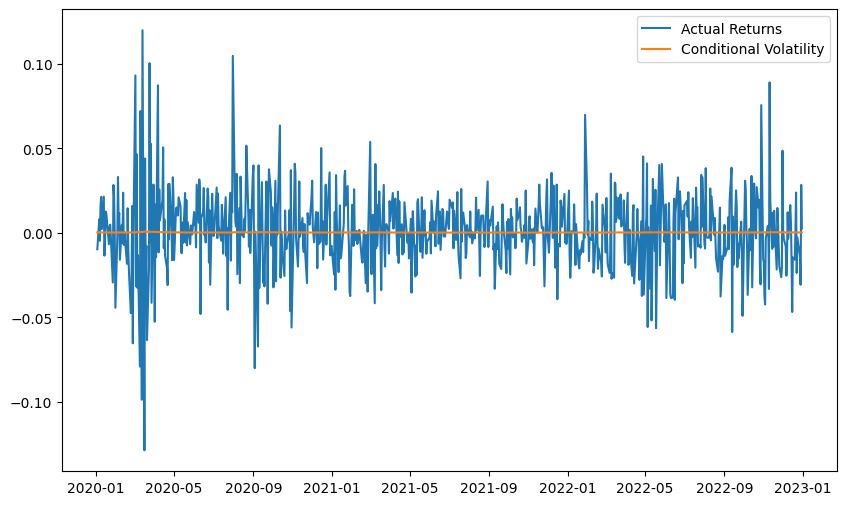

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from arch import arch_model

# Download Apple stock price data
symbol = 'AAPL'
data = yf.download(symbol, start='2020-01-01', end='2022-12-31')

# Calculate the daily returns
data['returns'] = data['Close'].pct_change().dropna()

# Drop NA values from returns
returns = data['returns'].dropna()

# Fit a GARCH(1, 1) model
model = arch_model(returns, vol='Garch', p=1, q=1)
results = model.fit()

# Print the summary
print(results.summary())

# Plot the actual returns
plt.figure(figsize=(10, 6))
plt.plot(returns, label='Actual Returns')

# Plot the model's conditional volatility
plt.plot(results.conditional_volatility / 100, label='Conditional Volatility') # divide by 100 to match scale
plt.legend()
plt.show()